# VMAE Model

In [1]:
import sys

sys.path.append('../..')

import torch
import pytorch_lightning as pl
import matplotlib.pyplot as plt

from torch.utils.data import DataLoader

from VISTorchUtils import VISDatasetV2
from utils import visCollateV2
from IPython.display import Audio

from VISVMAEModel import VISVMAEModel

In [2]:
trainDataset = VISDatasetV2('/scratch/vis_data_v2/train_sm')
valDataset = VISDatasetV2('/scratch/vis_data_v2/test_sm')

/home2/dhruv.kapur/anaconda3/envs/torch/lib/python3.9/site-packages/transformers/models/videomae/feature_extraction_videomae.py:28: FutureWarning: The class VideoMAEFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use VideoMAEImageProcessor instead.
  warnings.warn(


In [3]:
BATCH_SIZE=4

In [4]:
trainDataLoader = DataLoader(trainDataset, batch_size=BATCH_SIZE, collate_fn=visCollateV2, shuffle=True, num_workers=6)
valDataLoader = DataLoader(valDataset, batch_size=BATCH_SIZE, collate_fn=visCollateV2, shuffle=True, num_workers=6)

In [7]:
model = VISVMAEModel.load_from_checkpoint('tb_logs/VMAEModel/version_0/checkpoints/epoch=6-step=17605.ckpt')

In [27]:
coch, frames, material = next(iter(valDataLoader))
coch_pred = model(frames)[1].detach().cpu()

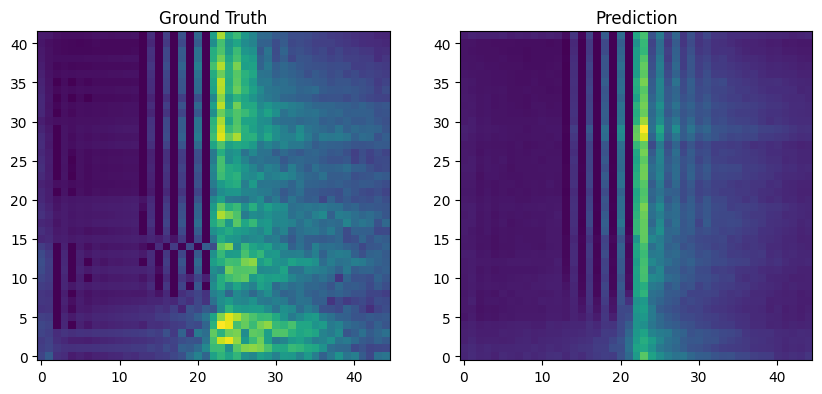

In [28]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

axs[0].imshow(coch[0].detach().cpu(), origin='lower')
axs[0].set_title('Ground Truth')
axs[1].imshow(coch_pred, origin='lower')
axs[1].set_title('Prediction')
plt.show()

In [29]:
print(torch.norm(coch[0] - coch_pred))

tensor(3.8192)


In [20]:
from utils import waveFromCochleagram

In [30]:
wav = waveFromCochleagram(coch_pred.numpy())
wav_gt = waveFromCochleagram(coch[0].numpy())

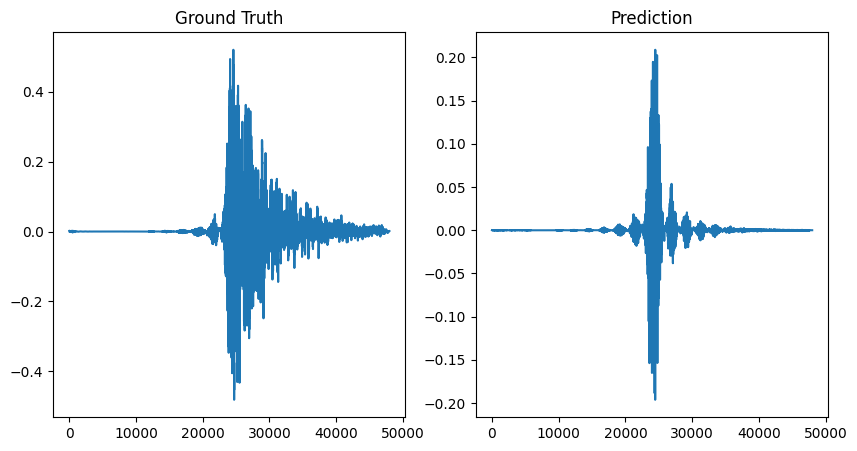

In [31]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

axs[0].plot(range(wav_gt.shape[0]), wav_gt)
axs[0].set_title('Ground Truth')
axs[1].plot(range(wav.shape[0]), wav)
axs[1].set_title('Prediction')

plt.show()

In [23]:
Audio(wav_gt, rate=96000)

In [24]:
Audio(wav, rate=96000)